# Student ID: 2487190G


# Cross Validation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import linalg
%matplotlib inline


In [2]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
print(labels.shape)
print(digits.data.shape)
print(data.shape)
print(labels[0:20])

(1797,)
(1797, 64)
(1797, 64)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [3]:
reduced_data = PCA(n_components=2).fit_transform(data)

### Visualizing the data:

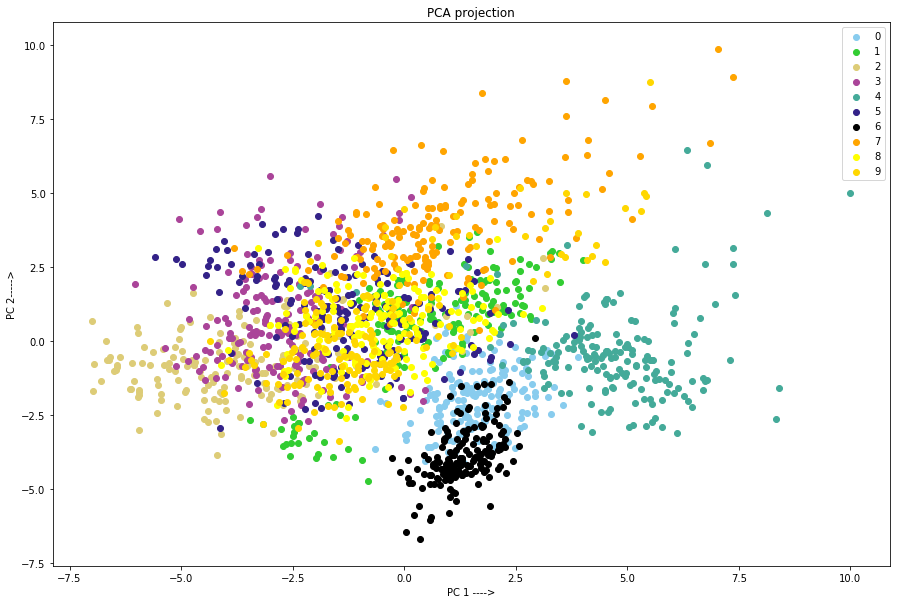

In [4]:
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
cmap_10=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold']

#Y_train_labels=np.unique(labels)
def plot_real_data():    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_10): #enumerating cmap_10 list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding labels is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color,
                        label=color_index)

    plt.title("PCA projection")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
plot_real_data()

# cross validation :

In [5]:
#Stratified k-fold will try to let the test set have all the groups.
stratas = StratifiedKFold(n_splits=5) #splitting the data into 80-20% train-test




cov_type=['full','spherical','diag','tied']

loglikelihood_df=pd.DataFrame(columns=cov_type, index=list(range(2,21))) #empty Data Frame

print("The loglikelihood_df is an empty dataframe now, which will be filled with loglikelihood scores\n")



for covariance_type in cov_type:

    for cluster_numbers in range(2,21):

        loglikelihood=[]

        for train_index,test_index in stratas.split(reduced_data, labels):

            X_train, Y_train = reduced_data[train_index], labels[train_index]
            X_test,  Y_test  = reduced_data[train_index], labels[train_index]

            gmm = mixture.GaussianMixture(n_components=cluster_numbers, covariance_type=covariance_type, random_state=123)
            gmm.fit(X_train,Y_train)
            loglikelihood.append(gmm.score(X_test,Y_test)) #appending the scores
            
            
        loglikelihood_df.loc[cluster_numbers,covariance_type]=sum(loglikelihood)/len(loglikelihood) #filling the dataframe with loglikelihood
        
                
        
                
                
print("The loglikelihood_df is now filled with log-likelihood score: \n")
print(loglikelihood_df)
                
    


The loglikelihood_df is an empty dataframe now, which will be filled with loglikelihood scores

The loglikelihood_df is now filled with log-likelihood score: 

       full spherical     diag     tied
2  -4.64845  -4.69631 -4.68085  -4.6541
3  -4.60319  -4.66332 -4.64345 -4.63028
4   -4.5458  -4.59638 -4.58241  -4.6278
5   -4.5118  -4.55807 -4.53222 -4.60287
6  -4.50551  -4.55618 -4.52505 -4.59616
7   -4.4991  -4.54796 -4.51743    -4.58
8  -4.49427  -4.53117 -4.50994 -4.57322
9  -4.48662  -4.52339 -4.50424  -4.5603
10 -4.47915  -4.50942 -4.49527 -4.55152
11 -4.47631  -4.50826 -4.49215 -4.54732
12 -4.47191  -4.50012 -4.48783 -4.54113
13 -4.46947  -4.49572 -4.48416 -4.53475
14 -4.46388  -4.49078 -4.47879 -4.52857
15 -4.46184   -4.4858   -4.475 -4.52192
16 -4.45982  -4.48285 -4.47333 -4.51716
17 -4.45704  -4.48031 -4.47137 -4.51405
18 -4.45488  -4.47827 -4.46797 -4.51029
19 -4.45272  -4.47306 -4.46379 -4.49667
20 -4.45058   -4.4714  -4.4622 -4.49557


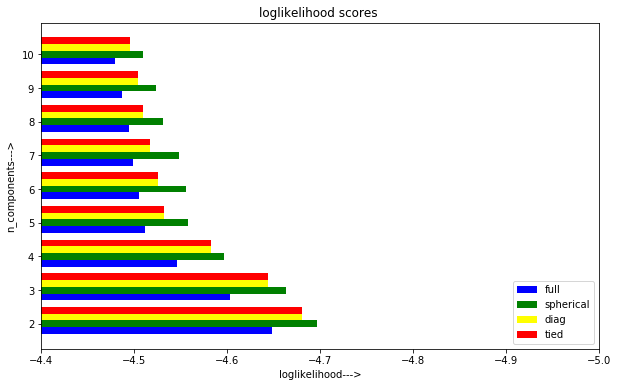

In [6]:
index=np.array([x for x in range(2,11)])
values1=[full for full in loglikelihood_df.loc[2:10,'full']]
values2=[spherical for spherical in loglikelihood_df.loc[2:10,'spherical']]
values3=[diag for diag in loglikelihood_df.loc[2:10,'diag']]
values4=[tied for tied in loglikelihood_df.loc[2:10,'tied']]

bw=0.2
plt.figure(figsize=(10,6))
#plt.axis([0,8,0,5])
plt.barh(index,values1,bw,color='b', label='full')

plt.barh(index+bw,values2,bw,color='g',label='spherical')
plt.barh(index+2*bw,values3,bw,color='yellow',label='diag')
plt.barh(index+3*bw,values3,bw,color='r',label='tied')
plt.yticks(index+bw,index)
plt.xlim(-4.4,-5)
plt.ylabel('n_components--->')
plt.xlabel('loglikelihood--->')
plt.title("loglikelihood scores ")
plt.legend(loc=4)

## Cluster 10 with covariance =full has the max loglikelihood

Text(0,0.5,'Held-out Loglikelihood')

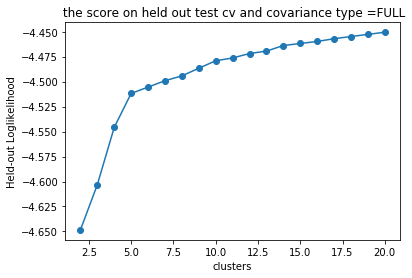

In [7]:
index=np.array([x for x in range(2,21)])
plt.plot(index,loglikelihood_df['full'],'o-')
plt.title(" the score on held out test cv and covariance type =FULL")
plt.xlabel("clusters")
plt.ylabel("Held-out Loglikelihood")

### We can see that the log likelihood between 2-10 is maximum at cluster 10 and covariance is 'full'

(1797, 2)


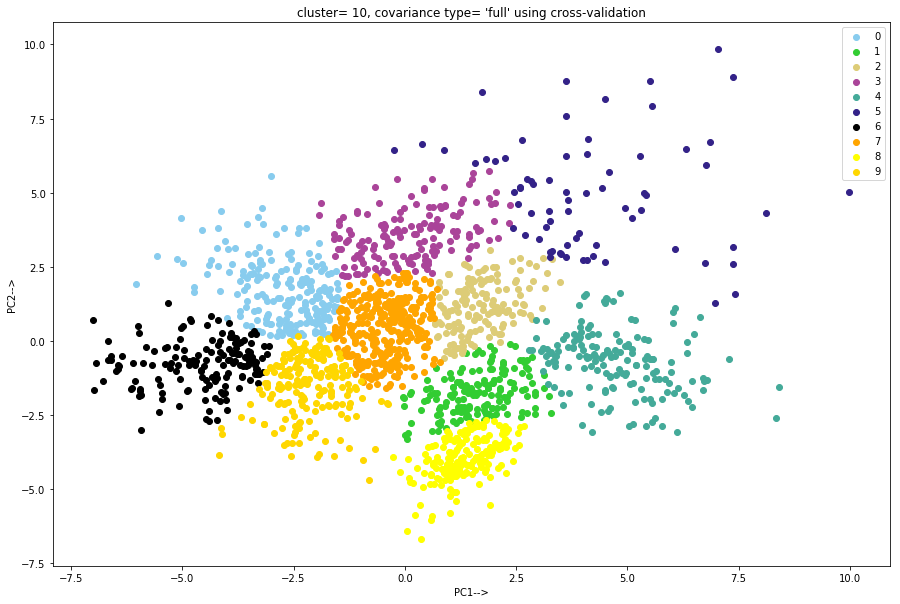

In [8]:
gmm = mixture.GaussianMixture(n_components=10,
                                      covariance_type='full', random_state=123)

gmm.fit(reduced_data,labels)

print(reduced_data.shape)
y_predict_cv=gmm.predict(reduced_data)
  

    


cmap_10=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','gold']

def plot_cv():
    
    plt.figure(figsize=(15,10))
    for color_index, color in enumerate(cmap_10):
        data_train = reduced_data[y_predict_cv == color_index] #selects reduced_data rows where corresponding y_predict_cv is color_index
        plt.scatter(data_train[:, 0], data_train[:, 1], color=color,label=color_index) #plotting the points corresponding to y_predict_cv=colo_index




    plt.title("cluster= 10, covariance type= 'full' using cross-validation")
    plt.xlabel("PC1-->")
    plt.ylabel("PC2-->")
    plt.legend(loc=0)
    
    


plot_cv()




# The below 3 cells will let us visualize which cluster contains which true labels.

In [9]:
'''
1) Creating an empty dataframe cluster_df that will contain the reduced_data+labels column+y_predict_cv as cluster column 1797X4
2) count_of_label(label,cluster) will give count of a true label assigned to a particular cluster
3) Sort cluster_df by cluster column
4) Creating cluster_wise_df which will contain the count of true label per cluster
5) Using 2 for loops to achieve this.


'''



#making DataFrame:
cluster_np=reduced_data.copy() #making a copy 

cluster_df=pd.DataFrame(cluster_np, columns=['PC1','PC2']) #creating a dataframe object
cluster_df['labels']=labels                     #adding the true labels column
cluster_df['clusters']=y_predict_cv           #adding the predicted clusters column


#this function returns the count of a true label assigned to a particular cluster: 


def count_of_label(label,cluster):
    return cluster_df[(cluster_df['labels']==label) &(cluster_df['clusters']==cluster)].count()['labels']

In [10]:
cluster_df.sort_values(by='clusters',inplace=True) #sorted the entire dataframe by clusters
#cluster_df.head(3)

cluster_wise_df=pd.DataFrame(columns=list(range(10)),index=list(range(10)))

print("The empty cluster_wise_df: \n")
print(cluster_wise_df)

for cluster in cluster_wise_df.columns:
    for label in cluster_wise_df.index:
        cluster_wise_df.iloc[label,cluster]=count_of_label(label,cluster) #filling each row,column with count of true label in that cluster
        
print("\nThe filled cluster_wise_df: \n")
print(cluster_wise_df)
print("\n Column is true label axis \n Row is cluster axis\n")

The empty cluster_wise_df: 

     0    1    2    3    4    5    6    7    8    9
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

The filled cluster_wise_df: 

    0    1   2    3    4   5    6   7    8   9
0   0  120  11    0    7   0    0   2   35   3
1   0    1  72    3    0   4    0  74    0  28
2  16    0   8    1    0   0  105  12    0  35
3  76    3   0   14    0   0   40  13    0  37
4   2    8   6    0  153  11    0   1    0   0
5  63    9  11   15    1   0    2  62    0  19
6   0   21   0    0    1   0    0   0  

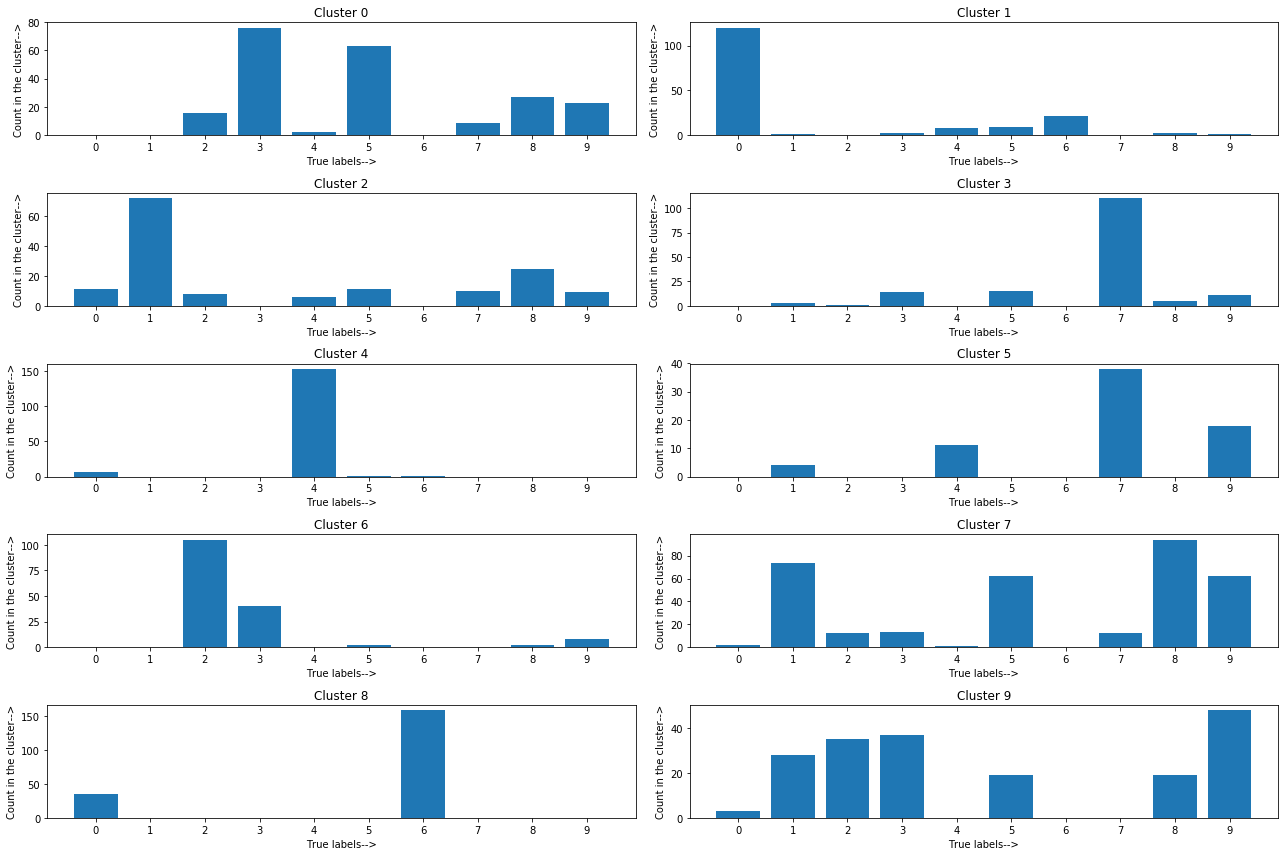

In [11]:

index=list(range(10))

fig,ax=plt.subplots(nrows=5,ncols=2, figsize=(18,12))

#bar plot to show the count of each true label in the cluster 0

ax[0,0].bar(index,cluster_wise_df[0])
ax[0,0].set_xticks(index)
ax[0,0].set_title('Cluster 0')
ax[0,0].set_ylabel('Count in the cluster-->')
ax[0,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 1

ax[0,1].bar(index,cluster_wise_df[1])
ax[0,1].set_xticks(index)
ax[0,1].set_title('Cluster 1')
ax[0,1].set_ylabel('Count in the cluster-->')
ax[0,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 2

ax[1,0].bar(index,cluster_wise_df[2])
ax[1,0].set_xticks(index)
ax[1,0].set_title('Cluster 2')
ax[1,0].set_ylabel('Count in the cluster-->')
ax[1,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 3

ax[1,1].bar(index,cluster_wise_df[3])
ax[1,1].set_xticks(index)
ax[1,1].set_title('Cluster 3')
ax[1,1].set_ylabel('Count in the cluster-->')
ax[1,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 4

ax[2,0].bar(index,cluster_wise_df[4])
ax[2,0].set_xticks(index)
ax[2,0].set_title('Cluster 4')
ax[2,0].set_ylabel('Count in the cluster-->')
ax[2,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 5

ax[2,1].bar(index,cluster_wise_df[5])
ax[2,1].set_xticks(index)
ax[2,1].set_title('Cluster 5')
ax[2,1].set_ylabel('Count in the cluster-->')
ax[2,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 6

ax[3,0].bar(index,cluster_wise_df[6])
ax[3,0].set_xticks(index)
ax[3,0].set_title('Cluster 6')
ax[3,0].set_ylabel('Count in the cluster-->')
ax[3,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 7

ax[3,1].bar(index,cluster_wise_df[7])
ax[3,1].set_xticks(index)
ax[3,1].set_title('Cluster 7')
ax[3,1].set_ylabel('Count in the cluster-->')
ax[3,1].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 8

ax[4,0].bar(index,cluster_wise_df[8])
ax[4,0].set_xticks(index)
ax[4,0].set_title('Cluster 8')
ax[4,0].set_ylabel('Count in the cluster-->')
ax[4,0].set_xlabel('True labels-->')

#bar plot to show the count of each true label in the cluster 9

ax[4,1].bar(index,cluster_wise_df[9])
ax[4,1].set_xticks(index)
ax[4,1].set_title('Cluster 9')
ax[4,1].set_ylabel('Count in the cluster-->')
ax[4,1].set_xlabel('True labels-->')

plt.tight_layout()

### According to the bar graph, cluster 8 suggests it has majority of digit 6, where as cluster 1 suggests it has majority of 0 digits.
### Which zone is the cluster 8 and cluster 1 according to our CV model?
### Cluster 8 is Yellow and cluster 1 is Limegreen according to our CV model.
### We can compare these two zones with the original PCA:
### According to PCA, 0s are in sky blue region and 6 is in black region and geographically same as suggested by our CV model.


In [12]:



#Given in the case study
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        

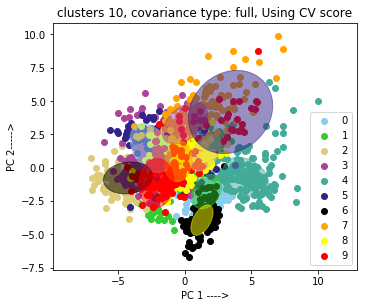

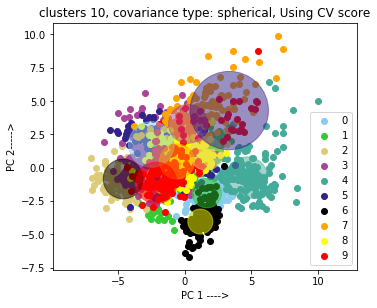

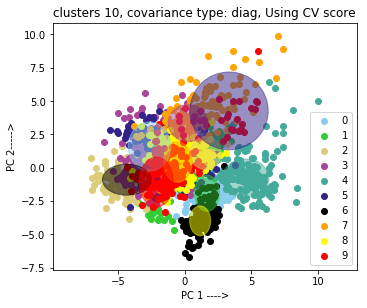

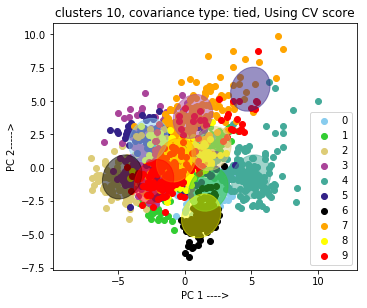

In [13]:
#colors = ['navy', 'turquoise', 'darkorange']
colors=['#88CCEE', 'limegreen', '#DDCC77','#AA4499','#44AA99','#332288','k','orange','yellow','red']

index=1 #it controls which subplot I am working on

#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

#for each covariance matrix, plotting the clusters:
for cov_matrix in ['full','spherical','diag','tied']:
    gmm = mixture.GaussianMixture(n_components=10,
                                      covariance_type=cov_matrix, max_iter=1000,random_state=123)

    y_predict_cv=gmm.fit_predict(reduced_data,labels)
    
    fig = plt.figure(figsize=(12,10))
    #ax = f.add_subplot(121)
    h = fig.add_subplot(2, 2, index) #4 plots
    
    make_ellipses(gmm, h) #this will make the clusters appear
    index+=1   
    
    #plotting the original data
    #https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py
    for color_index, color in enumerate(colors): #enumerating colors list to use the index
        data = reduced_data[labels == color_index]    #selects reduced_data rows where corresponding label is color_index
        plt.scatter(data[:, 0], data[:, 1], color=color, #plotting the original data
                        label=color_index)

    plt.title(f"clusters 10, covariance type: {cov_matrix}, Using CV score")
    plt.xlabel("PC 1 ---->")
    plt.ylabel("PC 2----->")
    plt.legend(loc=0)
    
    